# EDA

### Reading Train and Test Data

In [87]:
import pandas as pd
import seaborn as sns   
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import sklearn

In [88]:

# Read Train.csv and Test.csv
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
# print the head of train and test
print(train.head())
print(test.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [89]:
# describe train and test 
train.describe()
# test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [90]:
# print the columns of train and test 
print("Train Columns=",train.columns)
print("Test Columns=",test.columns)

Train Columns= Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Test Columns= Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [91]:
# print the shape of train and test specifically the number of rows and columns
print(train.shape)
print(test.shape)


(8523, 12)
(5681, 11)


In [92]:
# print first 5 rows of train 
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [93]:
# print first 5 rows of test
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Handling Missing Values

In [94]:
# count of total unique values in columns Item_Identifier
print("Categories in Item_Identifier\n",train['Item_Identifier'].value_counts())
# check if there is any missing value for this particular column
print("Missing values=",train['Item_Identifier'].isnull().sum())

Categories in Item_Identifier
 FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Missing values= 0


In [95]:
# count of total unique values in columns Item_Fat_Content
print("Categories in Item_Fat_Content\n",train['Item_Fat_Content'].value_counts())
# check if there is any missing value for this particular column
print("Missing values=",train['Item_Fat_Content'].isnull().sum())

Categories in Item_Fat_Content
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Missing values= 0


In [96]:
# count of total unique values in columns Item_Type
print("Categories in Item_Type\n",train['Item_Type'].value_counts())
# check if there is any missing value for this particular column
print("Missing values=",train['Item_Type'].isnull().sum())

Categories in Item_Type
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Missing values= 0


In [97]:
# count of total unique values in Outlet_Identifier
print("Categories in Outlet_Identifier\n",train['Outlet_Identifier'].value_counts())
# check if there is any missing value for this particular column
print("Missing values=",train['Outlet_Identifier'].isnull().sum())

Categories in Outlet_Identifier
 OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Missing values= 0


In [98]:
# count of total unique values in Outlet_Size
print("Categories in Outlet_Size\n",train['Outlet_Size'].value_counts())
# check if there is any missing value for this particular column
print("Missing values=",train['Outlet_Size'].isnull().sum())

Categories in Outlet_Size
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Missing values= 2410


In [99]:
# count of total unique values in Outlet_Location_Type
print("Categories in Outlet_Location_Type\n",train['Outlet_Location_Type'].value_counts())
# check if there is any missing value for this particular column
print("Missing values=",train['Outlet_Location_Type'].isnull().sum())

Categories in Outlet_Location_Type
 Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Missing values= 0


In [100]:
# count of total unique values in Outlet_Type
print("Categories in Outlet_Type\n",train['Outlet_Type'].value_counts())
# check if there is any missing value for this particular column
print("Missing values=",train['Outlet_Type'].isnull().sum())

Categories in Outlet_Type
 Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64
Missing values= 0


In [101]:
# check if there are any missing values in columns Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales and print the count of missing values with respect to each column
print("Missing values in Item_Weight=",train['Item_Weight'].isnull().sum())
print("Missing values in Item_Visibility=",train['Item_Visibility'].isnull().sum())
print("Missing values in Item_MRP=",train['Item_MRP'].isnull().sum())
print("Missing values in Outlet_Establishment_Year=",train['Outlet_Establishment_Year'].isnull().sum())
print("Missing values in Item_Outlet_Sales=",train['Item_Outlet_Sales'].isnull().sum())

Missing values in Item_Weight= 1463
Missing values in Item_Visibility= 0
Missing values in Item_MRP= 0
Missing values in Outlet_Establishment_Year= 0
Missing values in Item_Outlet_Sales= 0


In [102]:
## only Item_Weight and Outlet_Size have missing values

In [103]:
# check the train type of each column
print(train.dtypes)


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [104]:
# print traintype and number of missing values Outlet_Size and Item_Weight
print(train['Outlet_Size'].dtype)
print(train['Outlet_Size'].isnull().sum())
print(train['Item_Weight'].dtype)
print(train['Item_Weight'].isnull().sum())

object
2410
float64
1463


In [105]:
#  fill the missing values in Outlet_Size with the mode value
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

In [106]:
print("Categories in Outlet_Size\n",train['Outlet_Size'].value_counts())
# check if there is any missing value for this particular column
print("Missing values=",train['Outlet_Size'].isnull().sum())

Categories in Outlet_Size
 Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Missing values= 0


In [107]:
# fill the missing values in Item_Weight with the mean value of Item_Weight
# train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

<Axes: xlabel='Item_Weight', ylabel='Count'>

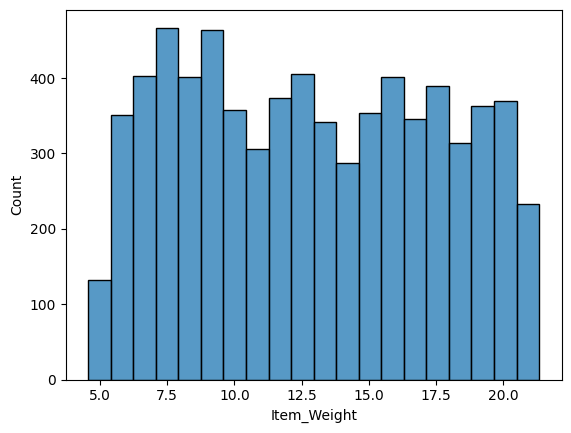

In [108]:
# plotting the histogram of Item_Weight
sns.histplot(train['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

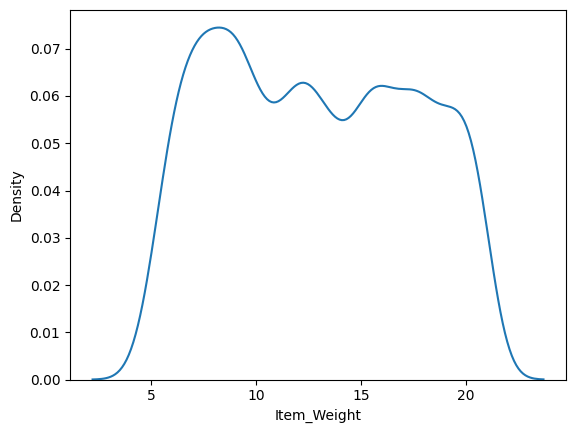

In [109]:
# plotting the probablity density function of Item_Weight
sns.kdeplot(train['Item_Weight'])

In [110]:
#  Even though many values are missing in item weight,item weight can be found out by using the item identifier
# so we will fill the missing values in item weight with the mean value of item weight for each item identifier
train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'),inplace=True)

In [111]:
# print missing value count for Item_Weight
print("Missing values=",train['Item_Weight'].isnull().sum())

Missing values= 4


In [112]:
# print the item identifier for which the item weight is missing
print(train[train['Item_Weight'].isnull()]['Item_Identifier'].value_counts())

FDN52    1
FDK57    1
FDE52    1
FDQ60    1
Name: Item_Identifier, dtype: int64


In [113]:
#  print item weight for each item identifier FDN52,FDK57,FDE52,FDQ60 for which item weight value is missing 
print(train[train['Item_Identifier']=='FDN52']['Item_Weight'])
print(train[train['Item_Identifier']=='FDK57']['Item_Weight'])
print(train[train['Item_Identifier']=='FDE52']['Item_Weight'])
print(train[train['Item_Identifier']=='FDQ60']['Item_Weight'])

927   NaN
Name: Item_Weight, dtype: float64
1922   NaN
Name: Item_Weight, dtype: float64
4187   NaN
Name: Item_Weight, dtype: float64
5022   NaN
Name: Item_Weight, dtype: float64


In [114]:
# Looking at the above plot we can see that the item weight is normally distributed so we can fill the missing values with the mean value of item weight
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [115]:
# print missing value count for Item_Weight
print("Missing values=",train['Item_Weight'].isnull().sum())

Missing values= 0


In [116]:
# check for missing value in outlet sales
print("Missing values=",train['Item_Outlet_Sales'].isnull().sum())

Missing values= 0


In [117]:
# calculate pearson corelation coefficient between Item_Outlet_Sales and (Item_MRP,Item_Weight,Item_Visibility,Outlet_Establishment_Year)) and store it in appropriate variables and print the values 
print("Pearson corelation coefficient between Item_Outlet_Sales and Item_MRP=",pearsonr(train['Item_Outlet_Sales'],train['Item_MRP']))
print("Pearson corelation coefficient between Item_Outlet_Sales and Item_Weight=",pearsonr(train['Item_Outlet_Sales'],train['Item_Weight']))
print("Pearson corelation coefficient between Item_Outlet_Sales and Item_Visibility=",pearsonr(train['Item_Outlet_Sales'],train['Item_Visibility']))
print("Pearson corelation coefficient between Item_Outlet_Sales and Outlet_Establishment_Year=",pearsonr(train['Item_Outlet_Sales'],train['Outlet_Establishment_Year']))


Pearson corelation coefficient between Item_Outlet_Sales and Item_MRP= PearsonRResult(statistic=0.5675744466569191, pvalue=0.0)
Pearson corelation coefficient between Item_Outlet_Sales and Item_Weight= PearsonRResult(statistic=0.01316457683624585, pvalue=0.22427861596076945)
Pearson corelation coefficient between Item_Outlet_Sales and Item_Visibility= PearsonRResult(statistic=-0.12862461222077035, pvalue=9.041287179923291e-33)
Pearson corelation coefficient between Item_Outlet_Sales and Outlet_Establishment_Year= PearsonRResult(statistic=-0.049134970440821095, pvalue=5.673082108321597e-06)


### Outlier Detection and Handling

In [118]:
# describe Item_Outlet_Sales,Item_MRP,Item_Weight,Item_Visibility
print(train['Item_Outlet_Sales'].describe())
print(train['Item_MRP'].describe())
print(train['Item_Weight'].describe())

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64
count    8523.000000
mean       12.875420
std         4.645008
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

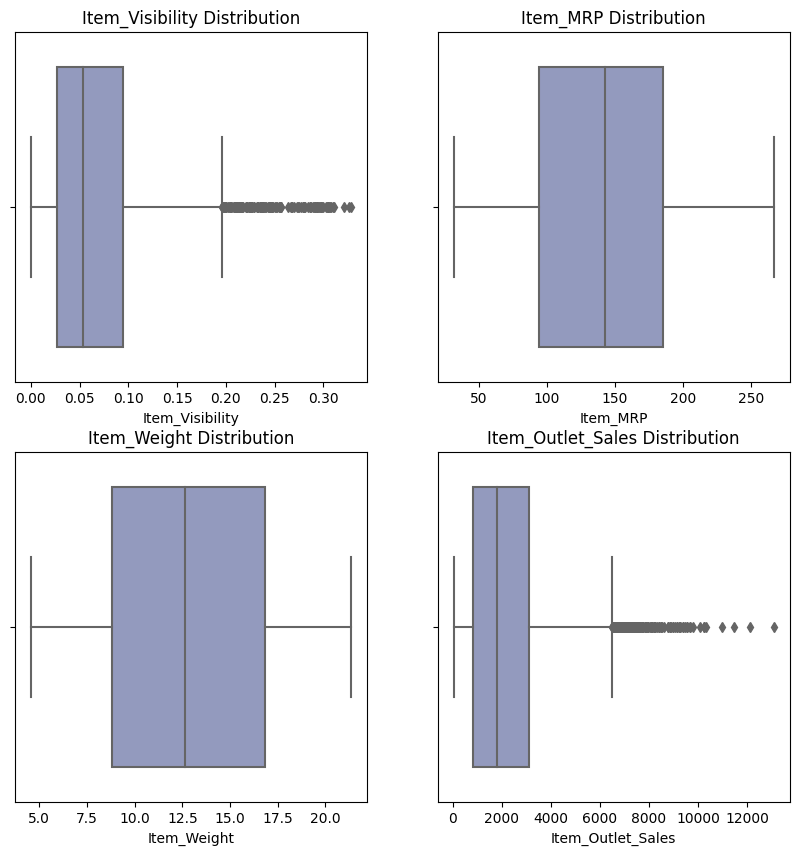

In [119]:
# create similar boxplot for Item_Visibility,Item_MRP,Item_Weight,Item_Outlet_Sales and put it in a subplot increase the subplot size to 2,2
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x=train['Item_Visibility'], palette='BuPu')
plt.title('Item_Visibility Distribution')
plt.subplot(2,2,2)
sns.boxplot(x=train['Item_MRP'], palette='BuPu')
plt.title('Item_MRP Distribution')
plt.subplot(2,2,3)
sns.boxplot(x=train['Item_Weight'], palette='BuPu')
plt.title('Item_Weight Distribution')
plt.subplot(2,2,4)
sns.boxplot(x=train['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item_Outlet_Sales Distribution') 
# Item Weight Distribution and Item MRP distribution do not have any outliers


In [120]:
# write a function to remove outliers from the train and pass the column name as a parameter to the function and return the trainframe without outliers 
def remove_outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    df=df[(df[col]>lower_bound) & (df[col]<upper_bound)]
    return df

# remove outliers from Item_Visibility,Item_Outlet_Sales
train=remove_outliers(train,'Item_Visibility')
train=remove_outliers(train,'Item_Outlet_Sales')

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

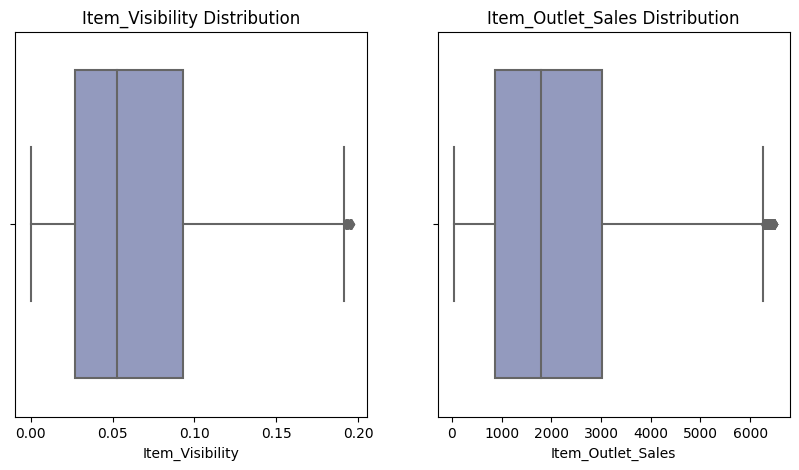

In [121]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=train['Item_Visibility'], palette='BuPu')
plt.title('Item_Visibility Distribution')
plt.subplot(1,2,2)
sns.boxplot(x=train['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item_Outlet_Sales Distribution') 
# removed outliers from Item_Visibility and Item_Outlet_Sales


C:\Users\guruj\AppData\Local\Temp\ipykernel_22556\2570204942.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

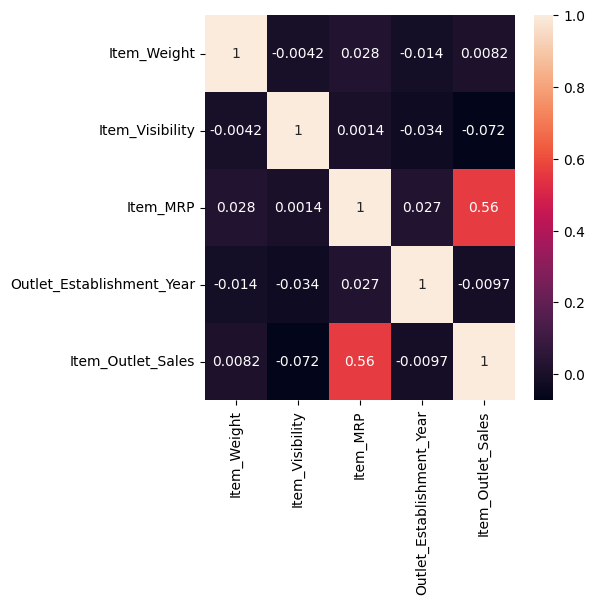

In [122]:
# corealtion matrix to check the corelation between the variables using heatmap
plt.figure(figsize=(5,5))
sns.heatmap(train.corr(),annot=True)

### Dealing with Categorical Variables

In [123]:
# Item_Identifier
# Item_Fat_Content
# Item_Type
# Outlet_Identifier
# Outlet_Size
# Outlet_Location_Type
# Outlet_Type

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
object
category
count                      8193
unique                       16
top       Fruits and Vegetables
freq                       1175
Name: Item_Type, dtype: object
category


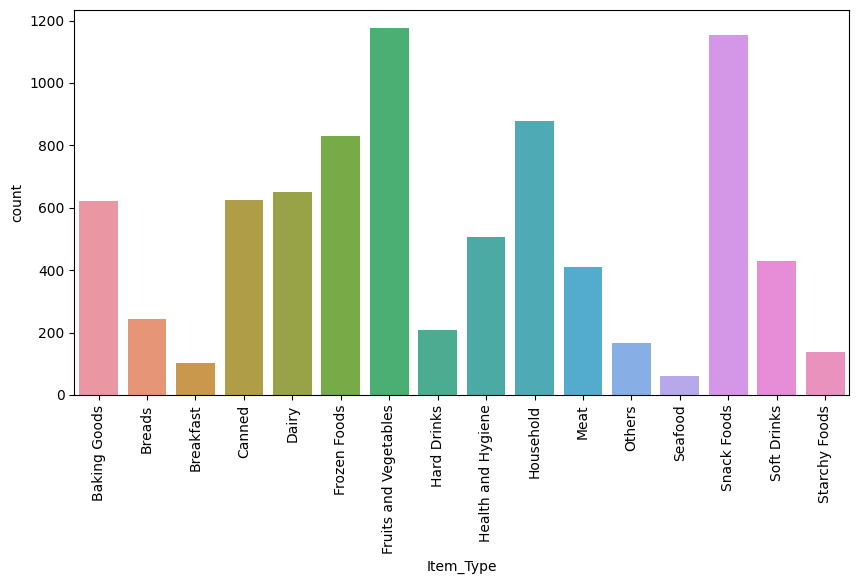

In [124]:
# print the columns of train
print(train.columns)
# print datatype of Item_Type column
print(train['Item_Type'].dtype)
# convert Item_Type column to category type
train['Item_Type']=train['Item_Type'].astype('category')
print(train['Item_Type'].dtype)
print(train['Item_Type'].describe())
print(train['Item_Type'].dtype.name)
# Bar chart to represent the count of each category in Item_Type column use diffrent color for each category for the bar chart make the category name in x axis as the label for each bar
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Type', data=train) 
plt.xticks(rotation=90)
plt.show()


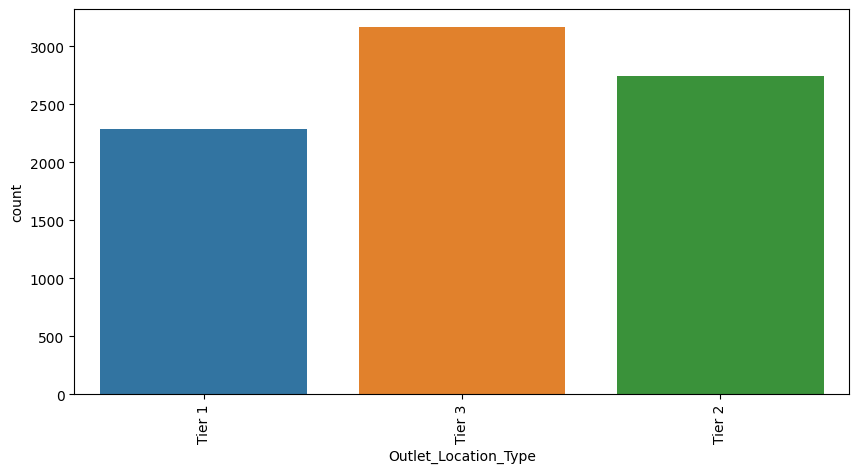

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Location_Type',data=train) 
plt.xticks(rotation=90)
plt.show()

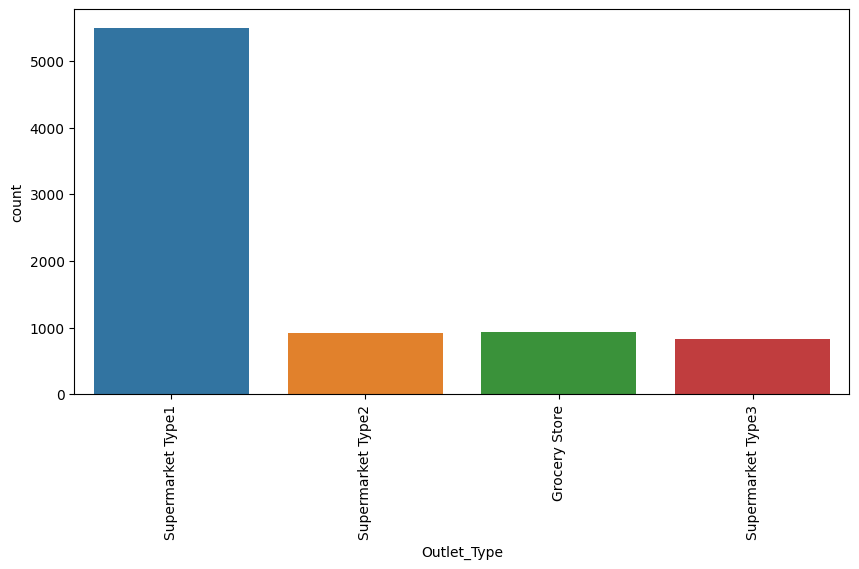

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type',data=train) 
plt.xticks(rotation=90)
plt.show()

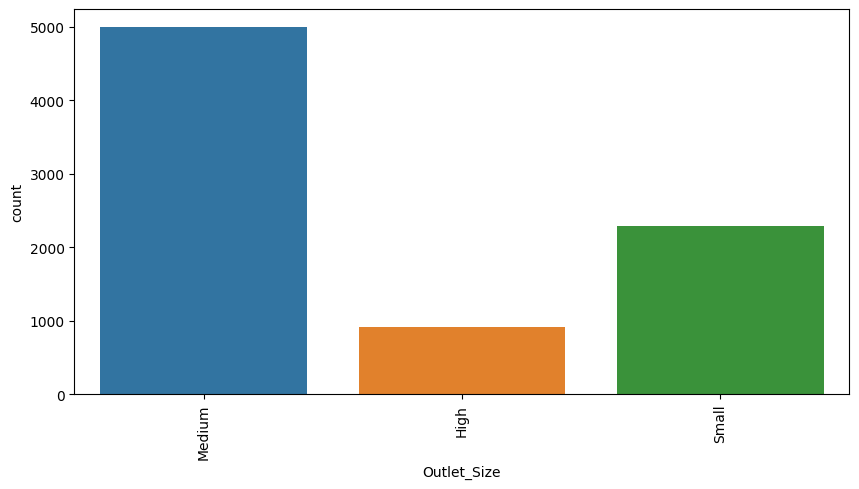

In [127]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Size',data=train) 
plt.xticks(rotation=90)
plt.show()

### Encoding Categorical Variables

In [128]:
# Label encoder for ordinal variables and one hot encoder for nominal variables
# Label encoder for Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
le=LabelEncoder()
train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])
train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']=le.fit_transform(train['Outlet_Type'])
print("Item_Fat_Content mapping=",dict(zip(le.classes_,le.transform(le.classes_))))
print("Outlet_Size mapping=",dict(zip(le.classes_,le.transform(le.classes_))))
print("Outlet_Location_Type mapping=",dict(zip(le.classes_,le.transform(le.classes_))))
print("Outlet_Type mapping=",dict(zip(le.classes_,le.transform(le.classes_))))

train.head()

Item_Fat_Content mapping= {'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}
Outlet_Size mapping= {'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}
Outlet_Location_Type mapping= {'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}
Outlet_Type mapping= {'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052


In [129]:
cols = ['Item_Type']
print(train.head())

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
train_oh = pd.DataFrame(encoder.fit_transform(train[cols])).astype('int64')


train_oh.columns = encoder.get_feature_names_out(cols)

train_oh.index = train.index


new_train = pd.concat([train, train_oh], axis=1)
new_train.head()

  Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30                 1         0.016047   
1           DRC01         5.92                 2         0.019278   
2           FDN15        17.50                 1         0.016760   
3           FDX07        19.20                 2         0.000000   
4           NCD19         8.93                 1         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2       

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,0,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,...,0,0,0,1,0,0,0,0,0,0


### Numerical Variables

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

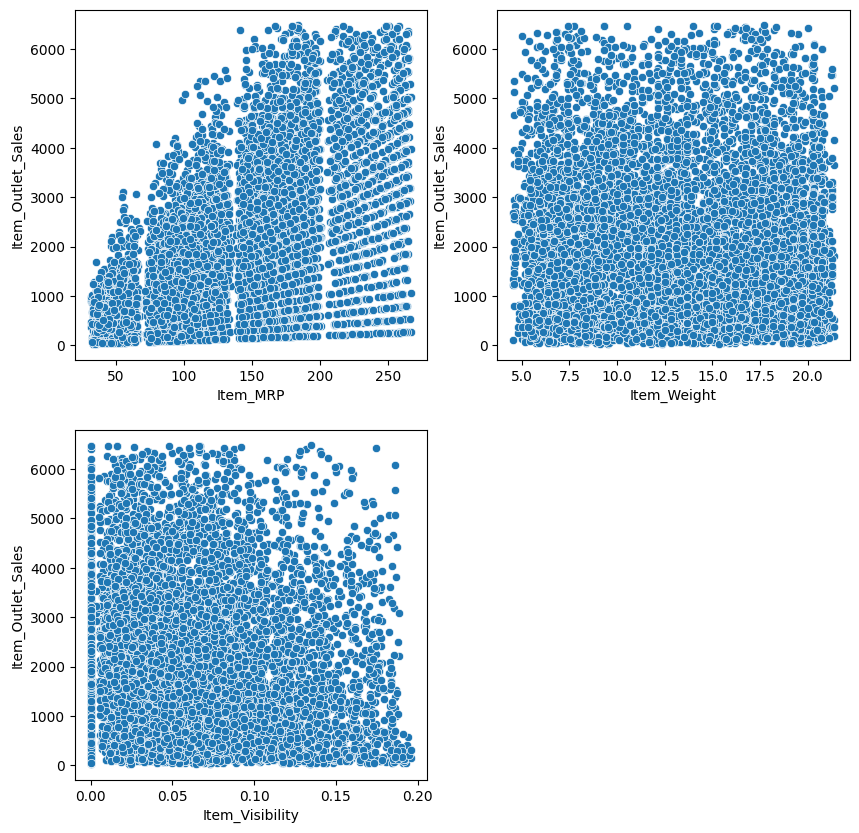

In [130]:
# in a single figure draw scatter plot between Item_Outlet_Sales and Item_MRP,Item_Weight,Item_Visibility
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.subplot(2,2,2)
sns.scatterplot(y='Item_Outlet_Sales',x='Item_Weight',data=train)
plt.subplot(2,2,3)
sns.scatterplot(y='Item_Outlet_Sales',x='Item_Visibility',data=train)


In [131]:
# We cannot draw any conclusion from the above scatter plots

### Relationship between features and Categorical Variables

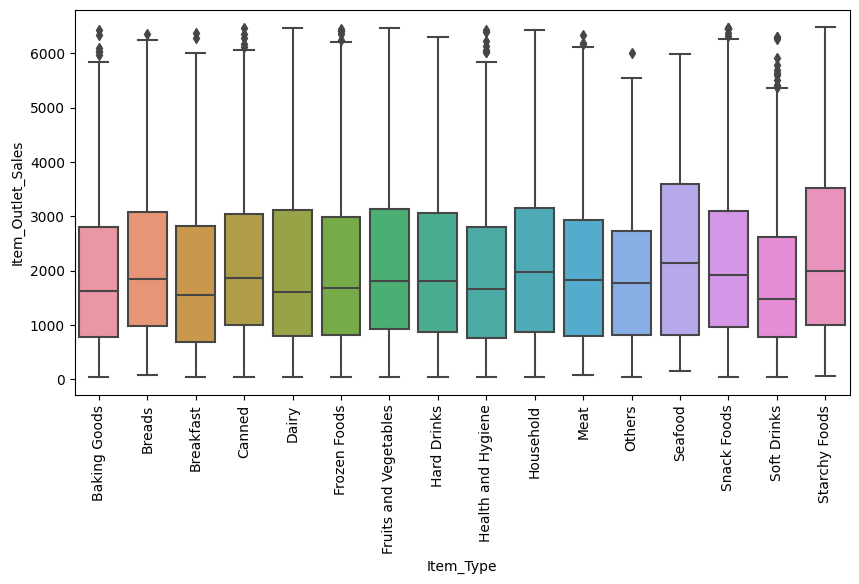

In [132]:
# in a single figure plot the distribution of Item_Outlet_Sales for each category in Item_Type column
plt.figure(figsize=(10,5))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)
plt.show()

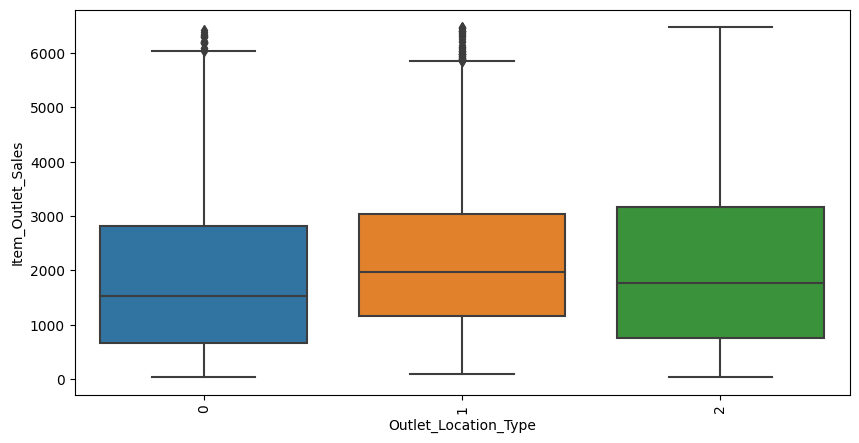

In [133]:
# in a single figure plot the distribution of Item_Outlet_Sales for each category in Outlet_Location_Type column
plt.figure(figsize=(10,5))
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)
plt.show()

# Modelling

In [134]:
grouped = train.groupby(['Item_Type','Outlet_Location_Type'])

# Calculate the correlation for each group
correlations = {}
for name, group in grouped:
    corr = group['Item_MRP'].corr(group['Item_Outlet_Sales'])
    correlations[name] = corr

# Display the correlations
correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
print(correlations_df)

                            Correlation
(Baking Goods, 0)              0.584545
(Baking Goods, 1)              0.681368
(Baking Goods, 2)              0.495914
(Breads, 0)                    0.504927
(Breads, 1)                    0.715949
(Breads, 2)                    0.425612
(Breakfast, 0)                 0.553522
(Breakfast, 1)                 0.618211
(Breakfast, 2)                 0.384991
(Canned, 0)                    0.528614
(Canned, 1)                    0.695544
(Canned, 2)                    0.539009
(Dairy, 0)                     0.584655
(Dairy, 1)                     0.693171
(Dairy, 2)                     0.517471
(Frozen Foods, 0)              0.655864
(Frozen Foods, 1)              0.707171
(Frozen Foods, 2)              0.576987
(Fruits and Vegetables, 0)     0.503501
(Fruits and Vegetables, 1)     0.673049
(Fruits and Vegetables, 2)     0.505930
(Hard Drinks, 0)               0.705117
(Hard Drinks, 1)               0.653130
(Hard Drinks, 2)               0.555558


In [135]:
# for each column in test dataframe the count of missing values
print(test.isnull().sum())


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [136]:
# appkly linear regression model to predict the Item_Outlet_Sales and print the mean squared # error and r2 score dependent variable is Item_Outlet_Sales and independent variables are Item_MRP

# split the train data into train and test data
x_train,x_test,y_train,y_test=train_test_split(train[['Item_MRP']],train['Item_Outlet_Sales'],test_size=0.2,random_state=0)
# create linear regression model
lr=LinearRegression()
# fit the model
lr.fit(x_train,y_train)
# predict the values
y_pred=lr.predict(X_test)
# print the mean squared error and r2 score
print("Mean squared error=",mean_squared_error(y_test,y_pred))
print("R2 score=",r2_score(y_test,y_pred))

Mean squared error= 1569968.7617387064
R2 score= 0.3187155349717843


In [137]:
# implement decision tree regressor model to predict the Item_Outlet_Sales and print the mean squared error and r2 score dependent variable is Item_Outlet_Sales and independent variables are Item_MRP

model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model.fit(x_train, y_train)

tree_predict = model.predict(x_test)

# Score Metrics 
DR_MAE = mean_absolute_error(y_test, tree_predict)
DR_MSE = mean_squared_error(y_test, tree_predict)

print(f" Mean Absolute Error: {DR_MAE}\n")
print(f" Mean Squared Error: {DR_MSE}\n")
print("R2 score=",metrics.r2_score(y_test,y_pred))

 Mean Absolute Error: 963.924119541666

 Mean Squared Error: 1587083.2633273478

R2 score= 0.3187155349717843


In [138]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# create random forest regressor model
rf=RandomForestRegressor(n_estimators=350,max_depth=5,min_samples_leaf=100)
# fit the model
rf.fit(x_train,y_train)
# predict the values
y_pred=rf.predict(x_test)
# print the mean absolute error and mean squared error
print("Mean absolute error=",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error=",metrics.mean_squared_error(y_test,y_pred))
# calculate the r2 score
print("R2 score=",metrics.r2_score(y_test,y_pred))

Mean absolute error= 956.0203649488967
Mean squared error= 1569166.2565193558
R2 score= 0.31906378033333027
